# Does flight delay correlate with day of the week?

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('data/flights_sample_random_cleaned.csv').drop(columns='Unnamed: 0')
df['fl_date'] = pd.to_datetime(df['fl_date'])

In [19]:
df.iloc[0].fl_date.day_name()
df['weekday'] = df['fl_date'].apply(lambda x: x.day_name())

In [28]:
def rem_outliers(df, col):
    ''' Remove outliers which fall outside of 3 standard deviations above and below the mean of the data set
            Input
                (0) dataframe containing the data
                (1) column to remove outliers from
            Output
                rows of df which are classified as outliers in the specified column are directly removed
                print out stating count of outliers removed '''
    mean, cutoff = np.mean(df[col]), np.std(df[col]) * 3   # 3 stddev outside the mean
    lower, upper = mean - cutoff, mean + cutoff
    outliers = [x for x in df[col] if x < lower or x > upper]
    df.drop(df[(df[col] > upper) | (df[col] < lower)].index, inplace=True)
    return f'{len(outliers)} outliers removed'

In [31]:
rem_outliers(df, 'arr_delay')

'160 outliers removed'

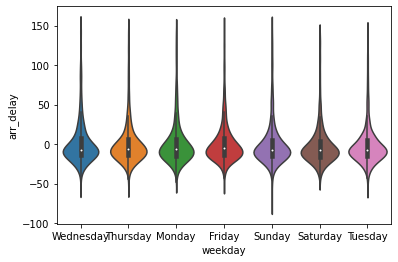

In [41]:
sns.violinplot(x=df['weekday'], y=df['arr_delay'])

In [27]:
df.groupby('weekday').agg('mean').arr_delay

weekday
Friday       6.402322
Monday       5.273991
Saturday     2.218135
Sunday       5.842496
Thursday     3.663272
Tuesday      4.224185
Wednesday    4.608407
Name: arr_delay, dtype: float64

## Not really

In [42]:
cols = ['dep_delay', 'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay']    

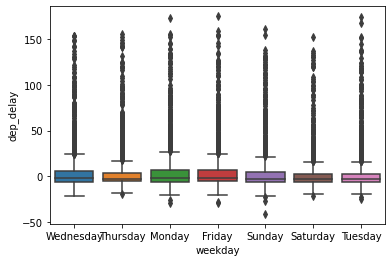

In [44]:
sns.boxplot(x = df['weekday'], y=df[cols[0]])

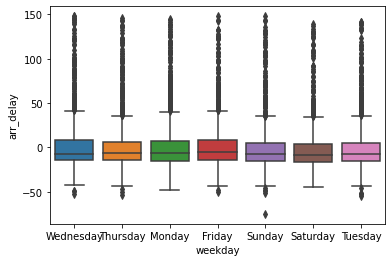

In [45]:
sns.boxplot(x = df['weekday'], y=df[cols[1]])

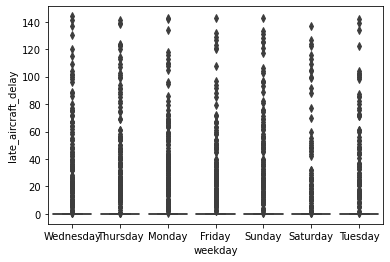

In [52]:
sns.boxplot(x = df['weekday'], y=df[cols[6]])